In [2]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
import numpy as np
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import pandas as pd


In [3]:
Num = 1
res_sen = pd.read_csv('conus_sens_N_hist.csv')
wet_Means = res_sen.Control.as_matrix()[[0,1]]
Q1_5_Means = res_sen.Q1_5.as_matrix()[[0,1]]
Q2_Means = res_sen.Q2.as_matrix()[[0,1]]
Q3_Means = res_sen.Q3.as_matrix()[[0,1]]
d1m_Means = res_sen.d1m.as_matrix()[[0,1]]
d0_7m_Means = res_sen.d0_7m.as_matrix()[[0,1]]
d0_5m_Means = res_sen.d0_5m.as_matrix()[[0,1]]
d0_3m_Means = res_sen.d0_3m.as_matrix()[[0,1]]
r004_Means = res_sen.R_0_04.as_matrix()[[0,1]]
r008_Means = res_sen.R_0_08.as_matrix()[[0,1]]


/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .value

In [ ]:
wet_Means[0]

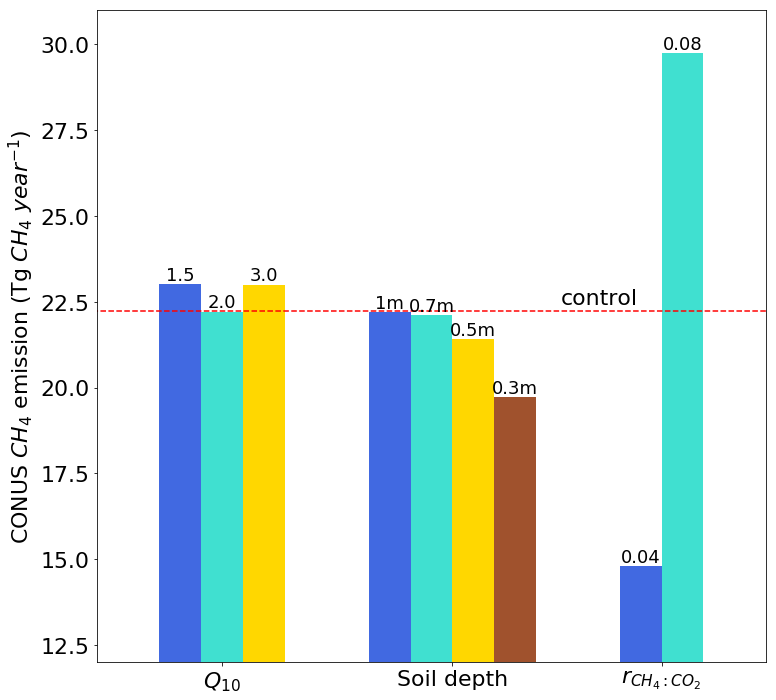

In [4]:
# Read in mean and std for all 4 fluxes and plot the bar chart
# a stacked bar plot with errorbars
fig = plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 22})
ind = np.arange(Num)    # the x locations for the groups
width = 0.05       # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind+0.2, Q1_5_Means[0], width, color='#4169e1')#, yerr=sourceStd)
p2 = plt.bar(ind+0.25, Q2_Means[0], width, color='#40e0d0')#, yerr=womenStd)
p3 = plt.bar(ind+0.3, Q3_Means[0], width, color='#ffd700')#, yerr=sinkStd) #bottom=menMeans, yerr=womenStd)

p4 = plt.bar(ind+0.45, d1m_Means[0], width, color='#4169e1')#, yerr=womenStd)
p5 = plt.bar(ind+0.5, d0_7m_Means[0], width, color='#40e0d0')#, yerr=netStd) #bottom=menMeans, yerr=womenStd)
p6 = plt.bar(ind+0.55, d0_5m_Means[0], width, color='#ffd700')#, yerr=womenStd)
p7 = plt.bar(ind+0.6, d0_3m_Means[0], width, color='#a0522d')#, yerr=oxidStd) #bottom=menMeans, yerr=womenStd)

p8 = plt.bar(ind+0.75, r004_Means[0], width, color='#4169e1')#, yerr=prodStd) #bottom=menMeans, yerr=womenStd)
p9 = plt.bar(ind+0.8, r008_Means[0], width, color='#40e0d0')#, yerr=prodStd) #bottom=menMeans, yerr=womenStd)

p10 = plt.plot([0., 1.0], [22.22, 22.22], "r--")

for rect in p1:
    #height = rect.get_height()
    #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    # We here don't show the actual number but the parameter values used
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "1.5", ha='center', va='bottom', fontsize=18)
for rect in p2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "2.0", ha='center', va='bottom', fontsize=18)
for rect in p3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "3.0", ha='center', va='bottom', fontsize=18)

for rect in p4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "1m", ha='center', va='bottom', fontsize=18)
for rect in p5:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "0.7m", ha='center', va='bottom', fontsize=18)
for rect in p6:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "0.5m", ha='center', va='bottom', fontsize=18)
for rect in p7:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "0.3m", ha='center', va='bottom', fontsize=18)

for rect in p8:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "0.04", ha='center', va='bottom', fontsize=18)
for rect in p9:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, "0.08", ha='center', va='bottom', fontsize=18)

for rect in p10:
    
    plt.text(0.7, 22.3, "control", ha='center', va='bottom')

#plt.errorbar(distance, 
#    energy, 
#    sigma, 
#    capsize=5, 
#    elinewidth=2,
#    markeredgewidth=2)
axes = plt.gca()
axes.set_xlim([0.1,0.9])
axes.set_ylim([12,31])

plt.ylabel('CONUS $CH_4$ emission (Tg $CH_4$ $year^{-1}$)')
# plt.title('Scores by group and gender')
plt.xticks([0.25, 0.525, 0.775], ('$Q_{10}$', 'Soil depth', '$r_{CH_{4}:CO_{2}}$'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0], p3[0], p5[0], p7[0], p8[0]), ('N, both', 'N, non-wetland', 
#                                                        'A, both', 'E, both', 'D, both', 'D, non-wetland'))

plt.show()
#plt.savefig('./figs3.png')

In [ ]:
plt.show(rect)

In [ ]:
countListFast = [1492.0, 497.0, 441.0, 218.0, 101.0, 78.0, 103.0]
countListSlow = [1718.0, 806.0, 850.0, 397.0, 182.0, 125.0, 106.0]

errorRateListOfFast = ['9.09', '9.09', '9.38', '9.40', '7.89', '8.02', '10.00']
errorRateListOfSlow = ['10.00', '13.04', '14.29', '12.50', '14.29', '14.53', '11.11']

opacity = 0.4
bar_width = 0.35

plt.xlabel('Tasks')
plt.ylabel('Error Rate')

plt.xticks(range(len(errorRateListOfFast)),('[10-20)', '[20-30)', '[30-50)', '[50-70)','[70-90)', '[90-120)', ' [120 < )'), rotation=30)
bar1 = plt.bar(np.arange(len(errorRateListOfFast))+ bar_width, errorRateListOfFast, bar_width, align='center', alpha=opacity, color='b', label='Fast <= 6 sec.')
bar2 = plt.bar(range(len(errorRateListOfSlow)), errorRateListOfSlow, bar_width, align='center', alpha=opacity, color='r', label='Slower > 6 sec.')

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()